# Import packages and function

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import collections as col
import statistics
from scipy.interpolate import UnivariateSpline
import glob 
import matplotlib.patches as mpatches

# Load modal data

In [6]:
modedatatype=([('file','i8'),('start','i8'),('end','i8'),('length','i8'),('mode','U1')])

In [7]:
mode_class = np.loadtxt(fname='mode_doc.csv', delimiter=',', dtype=modedatatype)

# Mode sequence plot

No handles with labels found to put in legend.


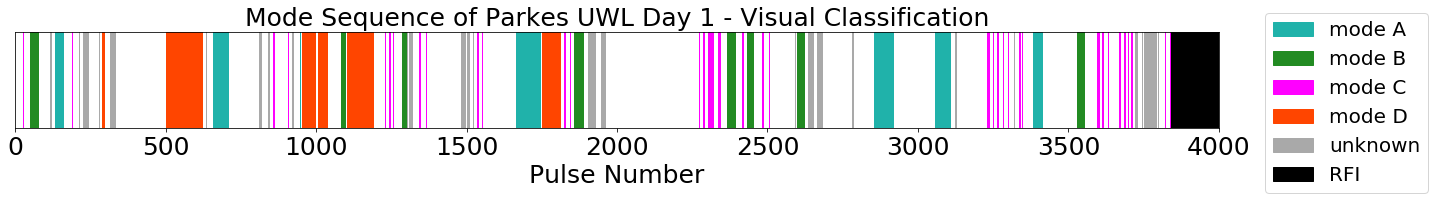

In [8]:
#Setting figure size and labels
plt.figure(figsize=(20, 3))
plt.title('Mode Sequence of Parkes UWL Day 1 - Visual Classification',fontsize=25)
plt.xlabel('Pulse Number',fontsize=25)
plt.yticks([])
plt.xticks(fontsize=25)

#Changing the colour for each mode
for mode in mode_class:
    if mode[4]=='N':
        col='white'
    elif mode[4]=='A':
        col='lightseagreen'
    elif mode[4]=='B':
        col='forestgreen'
    elif mode[4]=='C':
        col='magenta'
    elif mode[4]=='D':
        col='orangered'
    elif mode[4]=='U':
        col='darkgrey'
    else:
        col='black'
    
    #Setting coloured blocks for graph
    y=[0,0]
    y2=[1,1]
    
    #Adjusting start and end according to file (250 pulses per file)
    start=250*mode[0]+mode[1]
    end=250*mode[0]+mode[2]
    x=[start,end]
    
    #Fill area between the start and end
    plt.fill_between(x, y, y2, facecolor=col)
        
#Manually setting the axis limits
plt.axis([0,4000,0,1])

#Creating a legend for each modal colour
N = mpatches.Patch(color='white', label='nulls')
A = mpatches.Patch(color='lightseagreen', label='mode A')
B = mpatches.Patch(color='forestgreen', label='mode B')
C = mpatches.Patch(color='magenta', label='mode C')
D = mpatches.Patch(color='orangered', label='mode D')
O = mpatches.Patch(color='black', label='RFI')
U = mpatches.Patch(color='darkgrey', label='unknown')

plt.legend()
plt.legend(handles=[A,B,C,D,U,O],bbox_to_anchor=(1.03,1.3), loc="upper left", prop={'size': 20})
plt.tight_layout()

#Save figure
plt.savefig('Sequence')
